In [144]:
## ML IE2
## Yash Athawale 121B1B013
## Aditya Agre 121B1B006
## Vedant Bijwe 121B1B024
## Dataset : https://github.com/adityaagre/Machine-Learning/blob/main/SOCIAL_MEDIA_FAKES.csv

In [145]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn import svm

# Load the dataset
data = pd.read_csv("File1.csv")

## We are shuffling rows because cross validation score function probably does not do this by itself.
data = data.sample(frac = 1)

# Drop the 'isFake' column and rename 'Isfake' to 'target'
#data.drop(columns=['isFake'], inplace=True)
#data.rename(columns={'Isfake': 'target'})

# Separate features and target variable
y = data['Isfake']
X = data.drop(columns=['Isfake'])

## Cross Validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Finding the best k value using elbow method
k_list = []
acc_list = []
for i in range(1, 25, 2):

  # Making the KNN model
  k = i  # Number of neighbors
  knn_model = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn_model, X_scaled, y, cv=5)

  k_list.append(k)
  acc_list.append(score)
  print("Accuracy after considering ", k, " neighbours: ", score, np.average(score))

Accuracy after considering  1  neighbours:  [0.91631799 0.92468619 0.91213389 0.91213389 0.92436975] 0.9179283428852714
Accuracy after considering  3  neighbours:  [0.91631799 0.93723849 0.93305439 0.92050209 0.94117647] 0.9296578882599065
Accuracy after considering  5  neighbours:  [0.92887029 0.94142259 0.94560669 0.91631799 0.94537815] 0.9355191448964524
Accuracy after considering  7  neighbours:  [0.92468619 0.92887029 0.94142259 0.91631799 0.94537815] 0.9313350444780422
Accuracy after considering  9  neighbours:  [0.92468619 0.94142259 0.93723849 0.90376569 0.94117647] 0.9296578882599066
Accuracy after considering  11  neighbours:  [0.92887029 0.93723849 0.92468619 0.89539749 0.94957983] 0.927154460110404
Accuracy after considering  13  neighbours:  [0.93305439 0.93723849 0.92468619 0.89121339 0.94957983] 0.927154460110404
Accuracy after considering  15  neighbours:  [0.92887029 0.93723849 0.91631799 0.89958159 0.95378151] 0.9271579761611758
Accuracy after considering  17  neighbo

In [146]:
print(k_list)
for i in acc_list:
    print(i)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
[0.91631799 0.92468619 0.91213389 0.91213389 0.92436975]
[0.91631799 0.93723849 0.93305439 0.92050209 0.94117647]
[0.92887029 0.94142259 0.94560669 0.91631799 0.94537815]
[0.92468619 0.92887029 0.94142259 0.91631799 0.94537815]
[0.92468619 0.94142259 0.93723849 0.90376569 0.94117647]
[0.92887029 0.93723849 0.92468619 0.89539749 0.94957983]
[0.93305439 0.93723849 0.92468619 0.89121339 0.94957983]
[0.92887029 0.93723849 0.91631799 0.89958159 0.95378151]
[0.92887029 0.94142259 0.91631799 0.89958159 0.94957983]
[0.92887029 0.94142259 0.91631799 0.89121339 0.94957983]
[0.92887029 0.94979079 0.91213389 0.88702929 0.94117647]
[0.92887029 0.94142259 0.91631799 0.88284519 0.94117647]


In [147]:
## Finding average accuracy across cross validation folds

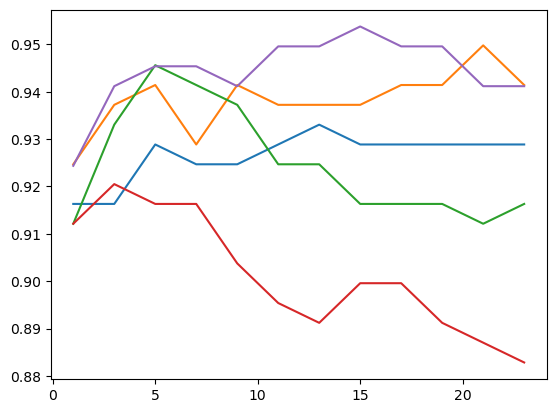

In [148]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array(k_list)
ypoints = np.array(acc_list)

plt.plot(xpoints, ypoints)
plt.show()

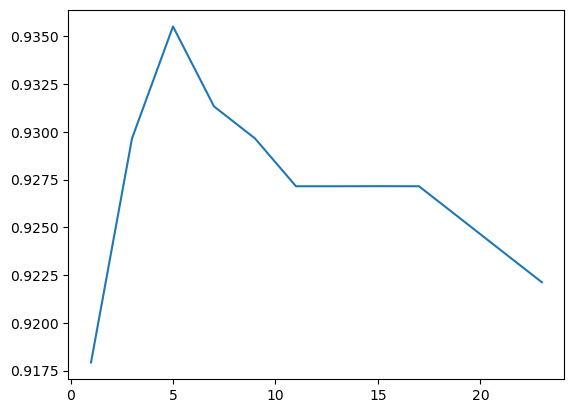

In [149]:
xpoints = np.array(k_list)
ypoints = np.array([np.average(i) for i in acc_list])
plt.plot(xpoints, ypoints)
plt.show()

In [150]:
print(xpoints)
print(ypoints)

[ 1  3  5  7  9 11 13 15 17 19 21 23]
[0.91792834 0.92965789 0.93551914 0.93133504 0.92965789 0.92715446
 0.92715446 0.92715798 0.92715446 0.92548082 0.92380015 0.92212651]


In [151]:
## Best accuracy at k = 3
knn_model = KNeighborsClassifier(n_neighbors=3)
score_knn_k = cross_val_score(knn_model, X_scaled, y, cv=5)
print(score_knn_k)

[0.91631799 0.93723849 0.93305439 0.92050209 0.94117647]


In [152]:
knn_avg_acc = np.average(score_knn_k)
print(knn_avg_acc)

0.9296578882599065


In [153]:
knn_model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=3)

In [154]:
knn_model.predict(np.array([[25, 1937, 0, 0, 1, 1, 0, 10]]))

array(['Yes'], dtype=object)

In [155]:
k_list_weighted = []
acc_list_weighted = []

for i in range(1, 25, 2):

  # Making the KNN model
  k = i  # Number of neighbors
  knn_model_weighted = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
  score_weighted = cross_val_score(knn_model_weighted, X_scaled, y, cv=5)

  k_list_weighted.append(k)
  acc_list_weighted.append(score_weighted)
  print("Accuracy after considering ", k, " neighbours: ", score_weighted, np.average(score_weighted))

Accuracy after considering  1  neighbours:  [0.91631799 0.92468619 0.91213389 0.91213389 0.92436975] 0.9179283428852714
Accuracy after considering  3  neighbours:  [0.91631799 0.93723849 0.92887029 0.92050209 0.93697479] 0.9279807320417707
Accuracy after considering  5  neighbours:  [0.92468619 0.94979079 0.94142259 0.90794979 0.93277311] 0.931324496325727
Accuracy after considering  7  neighbours:  [0.92468619 0.94142259 0.93305439 0.91213389 0.93277311] 0.928814036074681
Accuracy after considering  9  neighbours:  [0.92887029 0.94142259 0.94142259 0.90376569 0.94117647] 0.9313315284272706
Accuracy after considering  11  neighbours:  [0.92468619 0.94142259 0.92887029 0.89958159 0.94117647] 0.9271474280088604
Accuracy after considering  13  neighbours:  [0.92468619 0.93723849 0.92887029 0.89121339 0.94117647] 0.9246369677578145
Accuracy after considering  15  neighbours:  [0.93305439 0.94142259 0.91631799 0.89539749 0.94537815] 0.9263141239759503
Accuracy after considering  17  neighbo

In [156]:
print(k_list_weighted)
for i in acc_list_weighted:
    print(i)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
[0.91631799 0.92468619 0.91213389 0.91213389 0.92436975]
[0.91631799 0.93723849 0.92887029 0.92050209 0.93697479]
[0.92468619 0.94979079 0.94142259 0.90794979 0.93277311]
[0.92468619 0.94142259 0.93305439 0.91213389 0.93277311]
[0.92887029 0.94142259 0.94142259 0.90376569 0.94117647]
[0.92468619 0.94142259 0.92887029 0.89958159 0.94117647]
[0.92468619 0.93723849 0.92887029 0.89121339 0.94117647]
[0.93305439 0.94142259 0.91631799 0.89539749 0.94537815]
[0.92468619 0.94560669 0.92050209 0.89958159 0.93697479]
[0.92887029 0.94142259 0.92050209 0.89539749 0.93697479]
[0.92468619 0.94560669 0.92050209 0.89121339 0.93697479]
[0.92887029 0.94560669 0.91631799 0.89121339 0.93697479]


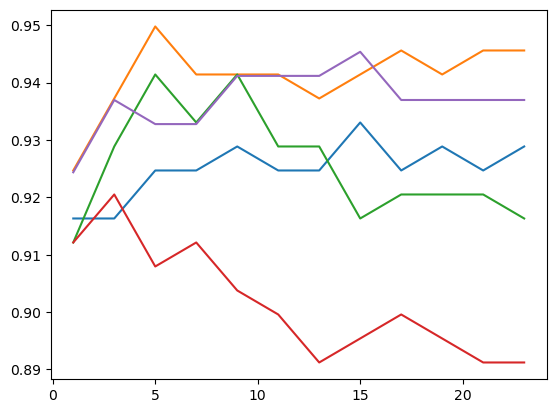

In [157]:
xpoints = np.array(k_list_weighted)
ypoints = np.array(acc_list_weighted)

plt.plot(xpoints, ypoints)
plt.show()

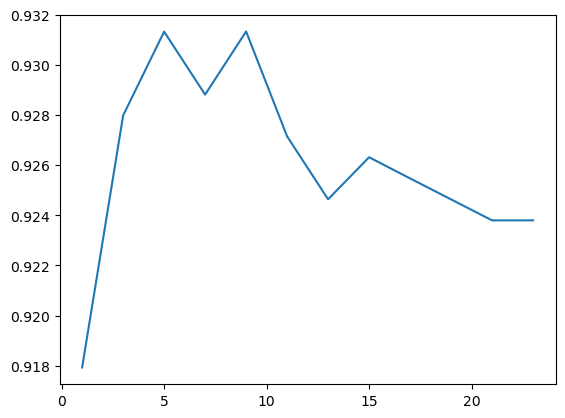

In [158]:
## Average accuracy for each value of k across cross validations
xpoints = np.array(k_list_weighted)
averaged_list_per_k_weighted = [np.average(i) for i in acc_list_weighted]
ypoints = np.array(averaged_list_per_k_weighted)

plt.plot(xpoints, ypoints)
plt.show()

In [159]:
print(k_list_weighted)
print(averaged_list_per_k_weighted)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
[0.9179283428852714, 0.9279807320417707, 0.931324496325727, 0.928814036074681, 0.9313315284272706, 0.9271474280088604, 0.9246369677578145, 0.9263141239759503, 0.9254702717907246, 0.9246334517070427, 0.9237966316233607, 0.9237966316233607]


In [182]:
## Best accuracy at k = 5
knn_model_weighted = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
score_knn_k_weighted = cross_val_score(knn_model, X_scaled, y, cv=5)
print(score_knn_k_weighted)

[0.91631799 0.93723849 0.93305439 0.92050209 0.94117647]


In [185]:
knn_weighted_avg_acc = np.average(score_knn_k_weighted)
print(knn_weighted_avg_acc*100)

92.96578882599064


In [ ]:
knn_model_weighted.fit(X_scaled, y)

In [161]:
knn_model_weighted.predict(np.array([[25, 1937, 0, 0, 1, 1, 0, 10]]))

array(['Yes'], dtype=object)

In [162]:
## Therefore best performance is shown by using 3 neighbours.

In [163]:

print(np.average(score)*100)

92.21265075067684


In [164]:
## Using Logistic regression

# import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# LogisticRegression
LR_object = LogisticRegression(random_state=42)
scores = cross_val_score(LR_object, X_scaled, y, cv=5)
print(scores)

[0.94142259 0.9707113  0.93723849 0.92468619 0.95378151]


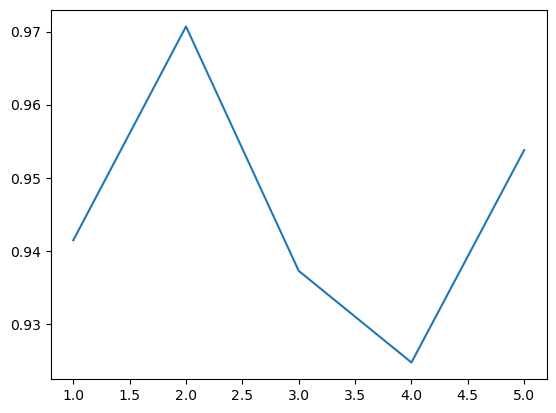

In [165]:
xpoints = np.array([1,2,3,4,5])
averaged_list_per_k_weighted = scores
ypoints = np.array(averaged_list_per_k_weighted)

plt.plot(xpoints, ypoints)
plt.show()

In [166]:
LR_average_acc = np.average(score)
print("Logistic Regression model accuracy (in %):", LR_average_acc)

Logistic Regression model accuracy (in %): 0.9221265075067684


In [167]:
LR_object.fit(X_scaled, y)

LogisticRegression(random_state=42)

In [168]:
LR_object.predict(np.array([[25, 1937, 0, 0, 1, 1, 0, 10]]))

array(['Yes'], dtype=object)

In [169]:
## SVM

In [170]:
svm_object = svm.SVC(kernel='linear', C=1, random_state=42)
scores_svm = cross_val_score(svm_object, X_scaled, y, cv=5)
scores_svm

array([0.94560669, 0.9665272 , 0.93723849, 0.93305439, 0.95378151])

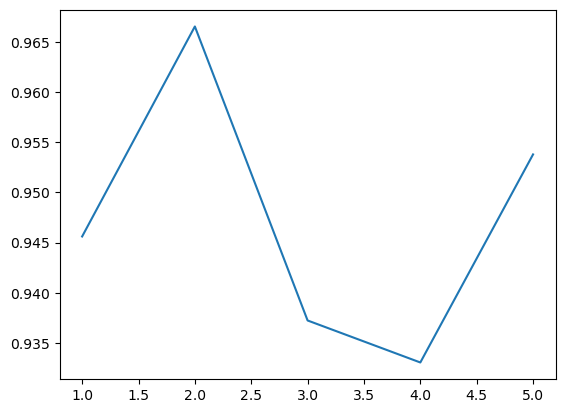

In [171]:
xpoints = np.array([1,2,3,4,5])
averaged_list_per_k_weighted = scores_svm
ypoints = np.array(averaged_list_per_k_weighted)

plt.plot(xpoints, ypoints)
plt.show()

In [172]:
svm_avg_acc = np.average(scores_svm)
print("SVM model accuracy (in %):", svm_avg_acc*100)

SVM model accuracy (in %): 94.7241658169544


In [173]:
svm_object.fit(X_scaled, y)
svm_object.predict(np.array([[25, 1937, 0, 0, 1, 1, 0, 10]]))

array(['Yes'], dtype=object)

In [174]:
## Random Forest

In [175]:
from sklearn.ensemble import RandomForestClassifier

RF_object = RandomForestClassifier(random_state=42)
scores_RF = cross_val_score(RF_object, X_scaled, y, cv=5)
print(scores_RF)

[0.9623431  0.9665272  0.9665272  0.94979079 0.95378151]


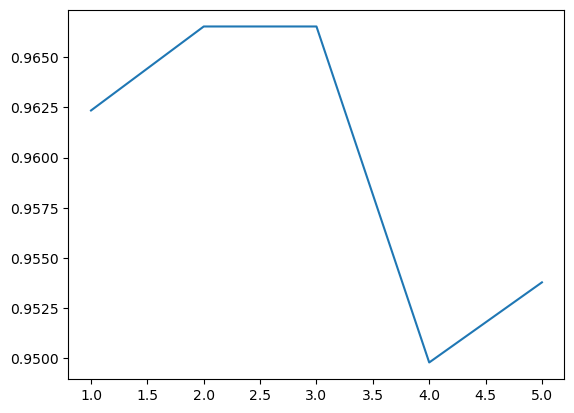

In [176]:
xpoints = np.array([1,2,3,4,5])
averaged_list_per_k_weighted = scores_RF
ypoints = np.array(averaged_list_per_k_weighted)

plt.plot(xpoints, ypoints)
plt.show()

In [177]:
rf_avg_acc = np.average(scores_RF)
print("Random Forest model sccuracy is: ", rf_avg_acc*100)

Random Forest model sccuracy is:  95.97939594247741


In [186]:
## Comparison:
print("Following are the accuracies found across various models. \nAll accuracies have been calculated after 5 fold cross validation.\n")
print("KNN accuracy: ", knn_avg_acc)
print("Weighted KNN accuracy: ", knn_weighted_avg_acc)
print("Logistoc Regression accuracy: ", LR_average_acc)
print("SVM accuracy: ", svm_avg_acc)
print("Random Forest accuracy: ", rf_avg_acc)

Following are the accuracies found across various models. 
All accuracies have been calculated after 5 fold cross validation.

KNN accuracy:  0.9296578882599065
Weighted KNN accuracy:  0.9296578882599065
Logistoc Regression accuracy:  0.9221265075067684
SVM accuracy:  0.947241658169544
Random Forest accuracy:  0.9597939594247741


In [194]:
results = {
    'Model' : ['KNN-3', 'Weighted-KNN-5', 'Logistic Regr.', 'SVM', 'Random Forest'],
    'Accuracies' : [knn_avg_acc*100, knn_weighted_avg_acc*100, LR_average_acc*100, svm_avg_acc*100, rf_avg_acc*100]
}

results_df = pd.DataFrame(results)
print(results_df)

            Model  Accuracies
0           KNN-3   92.965789
1  Weighted-KNN-5   92.965789
2  Logistic Regr.   92.212651
3             SVM   94.724166
4   Random Forest   95.979396


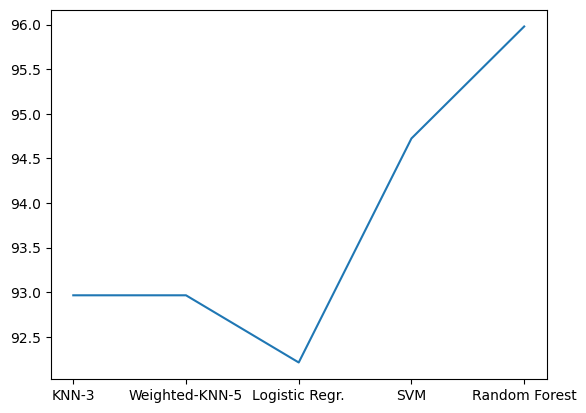

In [195]:
xpoints = results_df['Model']
ypoints = results_df['Accuracies']

plt.plot(xpoints, ypoints)
plt.show()